In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
diamonds = pd.read_csv('diamonds.csv')

In [3]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


There are no empty cells
time to split the data

In [5]:
diamonds.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
diamonds['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [7]:
cut = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
diamonds['cut'] = diamonds['cut'].map(cut)

In [8]:
diamonds['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [9]:
color = {'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1}
diamonds['color'] = diamonds['color'].map(color)

In [10]:
diamonds['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [11]:
clarity = {'I1': 1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8 }
diamonds['clarity'] = diamonds['clarity'].map(clarity)

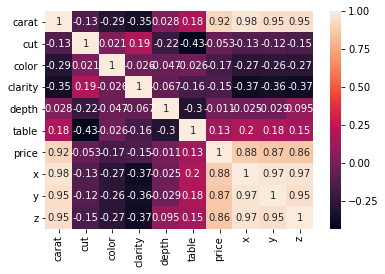

In [12]:
sns.heatmap(diamonds.corr(), annot=True)

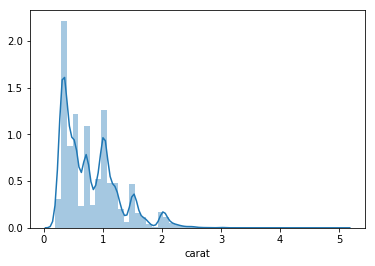

In [13]:
sns.distplot(diamonds['carat'])

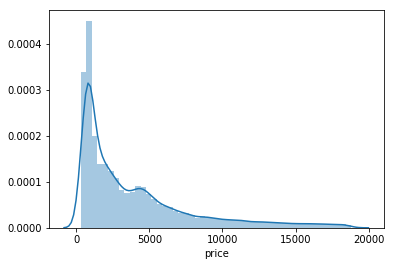

In [14]:
sns.distplot(diamonds['price'])

In [15]:
X = diamonds.drop(['price'], axis=1)
y = diamonds['price']

In [16]:
diamonds.drop(['table', 'depth', 'x', 'y', 'z'], axis=1, inplace=True)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
for i in [50, 100, 150, 200, 250, 300]:
    ranForReg = RandomForestRegressor(n_estimators=i)
    ranForReg.fit(X_train, y_train)
    
    preds = ranForReg.predict(X_test)
    print(f"Estimators: {i} score: {mean_squared_error(y_test, preds)}\n")

Estimators: 50 score: 287646.54840196355

Estimators: 100 score: 285652.53540820105

Estimators: 150 score: 287836.281476734

Estimators: 200 score: 287779.02337263984

Estimators: 250 score: 283558.8883426122

Estimators: 300 score: 285255.34946379514



In [24]:
ranForReg = RandomForestRegressor(n_estimators=250)
ranForReg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [25]:
final_preds = ranForReg.predict(X_test)
mean_squared_error(y_test, final_preds)

284880.4137871504

In [26]:
print(F"Model accuracy: {round(ranForReg.score(X, y)*100, 3)}")

Model accuracy: 99.279
